# Confidence vs Acceptance Rate Analysis

This notebook plots the relationship between the adapter's predicted confidence (probability of acceptance) and the actual acceptance rate.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_theme(style="whitegrid")

In [2]:
# Load data
try:
    with open('confidence_data.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Data file 'confidence_data.json' not found. Please run the collection script first.")
    data = {"little_draft": [], "draft_target": []}

def process_data(records):
    if not records:
        return pd.DataFrame()
    df = pd.DataFrame(records)
    # Bin probabilities
    bins = np.linspace(0, 1, 11) # 0.0, 0.1, ..., 1.0
    df['prob_bin'] = pd.cut(df['prob'], bins=bins, labels=bins[1:])
    return df

df_little = process_data(data['little_draft'])
df_draft = process_data(data['draft_target'])

print(f"Little -> Draft records: {len(df_little)}")
print(f"Draft -> Target records: {len(df_draft)}")

Little -> Draft records: 5340
Draft -> Target records: 3889


/tmp/ipykernel_2550456/451188470.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = df.groupby('prob_bin')['accepted'].mean().reset_index()
/tmp/ipykernel_2550456/451188470.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration['count'] = df.groupby('prob_bin')['accepted'].count().values
/tmp/ipykernel_2550456/451188470.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = df.groupby('

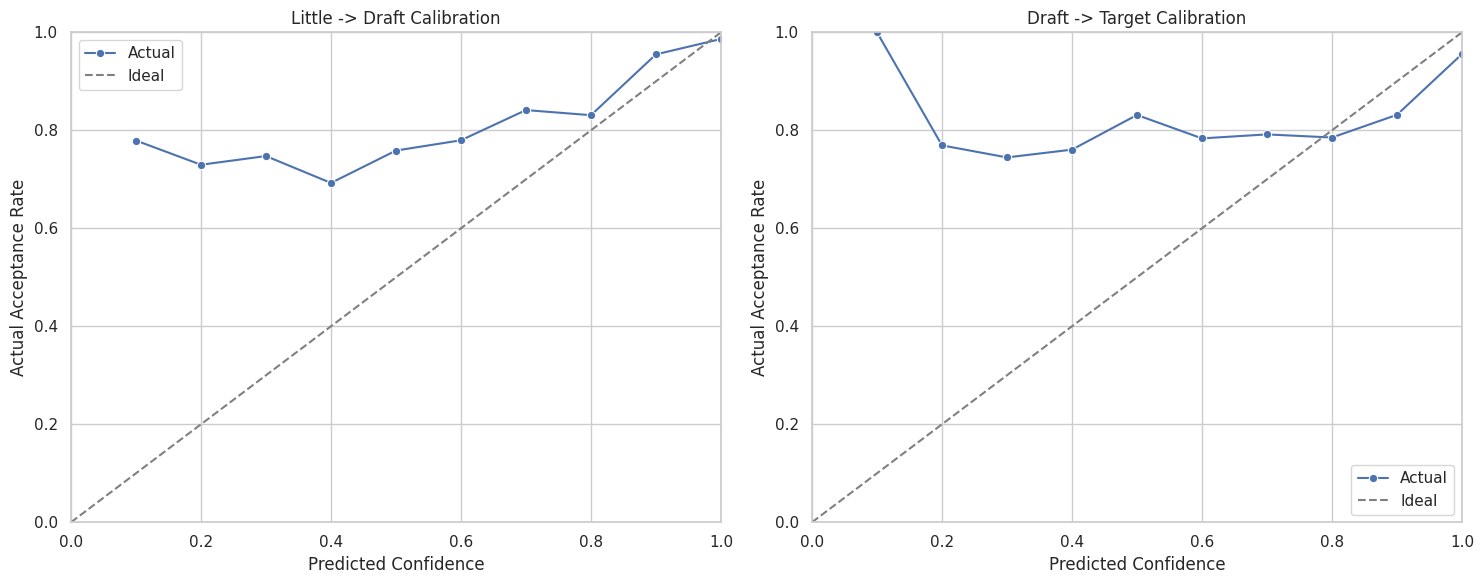

In [3]:
def plot_calibration_curve(df, title, ax):
    if df.empty:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center')
        return
        
    # Calculate acceptance rate per bin
    calibration = df.groupby('prob_bin')['accepted'].mean().reset_index()
    calibration['count'] = df.groupby('prob_bin')['accepted'].count().values
    
    # Filter out empty bins
    calibration = calibration[calibration['count'] > 0]
    
    # Convert bin labels to float for plotting
    calibration['prob_bin'] = calibration['prob_bin'].astype(float)
    
    sns.lineplot(data=calibration, x='prob_bin', y='accepted', marker='o', ax=ax, label='Actual')
    
    # Plot ideal calibration line
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')
    
    ax.set_title(title)
    ax.set_xlabel('Predicted Confidence')
    ax.set_ylabel('Actual Acceptance Rate')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_calibration_curve(df_little, 'Little -> Draft Calibration', axes[0])
plot_calibration_curve(df_draft, 'Draft -> Target Calibration', axes[1])

plt.tight_layout()
plt.show()